# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Load the US House Pricing dataset into a pandas DataFrame

In [3]:
df = pd.read_csv('USA_Housing.csv')
df.head(20)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
6,64698.463428,6.025336,8.147760,3.41,60828.249085,1.502056e+06,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ..."
7,78394.339278,6.989780,6.620478,2.42,36516.358972,1.573937e+06,"972 Joyce Viaduct\nLake William, TN 17778-6483"
8,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05,USS Gilbert\nFPO AA 20957
9,81885.927184,4.423672,8.167688,6.10,40149.965749,1.545155e+06,Unit 9446 Box 0958\nDPO AE 97025


## Summary of dataset

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
df.describe() 

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [6]:
df.dtypes

Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                          object
dtype: object

## Processing data

In [7]:
df.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

No null values.

## Heatmap showing the correlation coefficients between all pairs of features in the dataset.

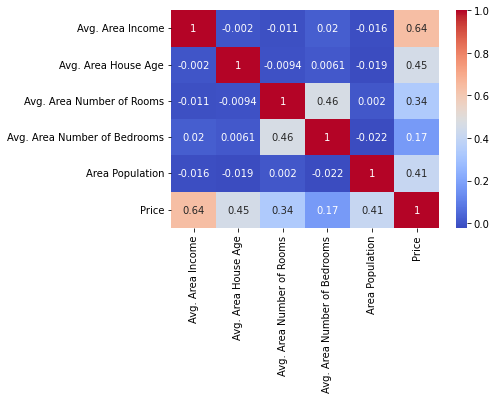

In [8]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap = 'coolwarm', annot = True);

## Let's consider 3 columns with the highest correlation with `price`, i.e. `Avg. Area Income`, `Avg. Area House Age`, `Avg. Area Number of Bedrooms`


Store the data of these columns in a seperate dataframe. Name it `data`

In [9]:
data = df[['Avg. Area Income', 'Avg. Area House Age', 'Area Population', 'Price']]
data

,Avg. Area Income,Avg. Area House Age,Area Population,Price
0,79545.458574,5.682861,23086.800503,1.059034e+06
1,79248.642455,6.002900,40173.072174,1.505891e+06
2,61287.067179,5.865890,36882.159400,1.058988e+06
3,63345.240046,7.188236,34310.242831,1.260617e+06
4,59982.197226,5.040555,26354.109472,6.309435e+05
...,...,...,...,...
4995,60567.944140,7.830362,22837.361035,1.060194e+06
4996,78491.275435,6.999135,25616.115489,1.482618e+06
4997,63390.686886,7.250591,33266.145490,1.030730e+06
4998,68001.331235,5.534388,42625.620156,1.198657e+06


In [10]:
X = data.drop(['Price'], axis = 1)
Y = data['Price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

## Train a linear regression model on the training data

In [11]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

## Evaluate the model's performance on the testing data

In [12]:
Y_pred = model.predict(X_test)
r2 = r2_score(Y_test, Y_pred)
print(f"R-squared score: {r2:.3f}")

R-squared score: 0.795


The R-value of the model is 0.795 ~ 0.8, which is good enough R-value. So we plot the scatter plot and check the fitting.

<AxesSubplot:xlabel='Price'>

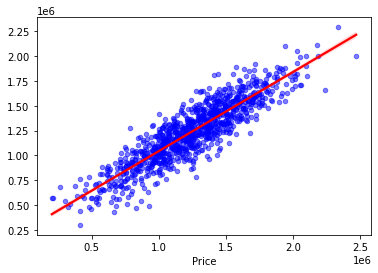

In [13]:
sns.regplot(x = Y_test, y = Y_pred, color = 'blue', scatter_kws = {'s': 20, 'alpha': 0.5}, line_kws = {'color': 'red'})

The data points are scattered around the line of regression. There are few outliers but those are close to the line of regression. 